[]

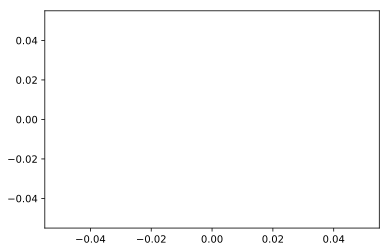

In [1]:
import pandas as pd
from IPython.display import Image, SVG

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
plt.plot()

## \section{One dimensional Model Fitting Framework}

First, the 3-dimensional DPD $\matr{H}$ of interest is projected by summing all the bins along one of the axis, and then squeezing the result into two dimensions. This process is repeated to obtain a one dimensional DPD $\matr{h}$ along the remaining axis.

Next, the DPD is converted to a DDPD $\matr{q}$ by dividing each bin height by its width. 

\begin{equation}
q_i = \frac{h_i}{\Delta H}
\label{eqn:QtoH}
\end{equation}

A zero-centered Gaussian distribution is fitted to this $\matr{q}$ by four methods. 

\begin{equation}
argmin_{\sigma^2} ||\matr{h} - \matr{p}(\overline{\matr{q}}, \sigma^2)||_1
\label{eqn:1dFit_method1}
\end{equation}

\begin{equation}
argmin_{\sigma^2} ||\matr{h} - \matr{p}(\overline{\matr{q}}, \sigma^2)||_2
\label{eqn:1dFit_method2}
\end{equation}

\begin{equation}
argmin_{\sigma^2} ||\matr{h} - \matr{p}_\epsilon(\overline{\matr{q}}, \sigma^2)||_1
\label{eqn:1dFit_method3}
\end{equation}

\begin{equation}
argmin_{\sigma^2} ||\matr{h} - \matr{p}_\epsilon(\overline{\matr{q}}, \sigma^2)||_2
\label{eqn:1dFit_method4}
\end{equation}

The function $\matr{p}(\overline{\matr{q}}, \sigma^2)$ computes the probability value for each of the bins by integrating along its limits. For this experiment, a simple trapezoidal approximation is used.



\begin{equation}
p_i = \frac{1}{2} [ g_{0, \sigma^2}(\overline{q}_i - \Delta q/2) + g_{0, \sigma^2}(\overline{q}_i + \Delta q/2) ]
\label{eqn:1dFit_pFunc}
\end{equation}

Where $\Delta q$ is the width of the bin of the DDPD, and $g_{\mu, \sigma^2}(x)$ is the density of a Gaussian with mean $\mu$ and variance $\sigma^2$ evaluated at $x$. Note that in problems specified from \ref{eqn:1dFit_method1} to \ref{eqn:1dFit_method4} we do not use $\matr{q}$ directly, but instead the probability (already computed in $\matr{h}$).

Each optimization problem is solved by doing a grid search in the neighborhood around $Var(\matr{q})$ by a given number of equidistant steps. The radius of the neighborhood is 99.9\% of $Var(\matr{q})$.

### \subsection{Results}

In order to check for biases in the estimation, the former method is obtained for 3 different ICVF levels, arbitrarily labeled as low, mid and high. For each simulation of interest, three histograms are computed for intracellular, extracellular and total displacement.  


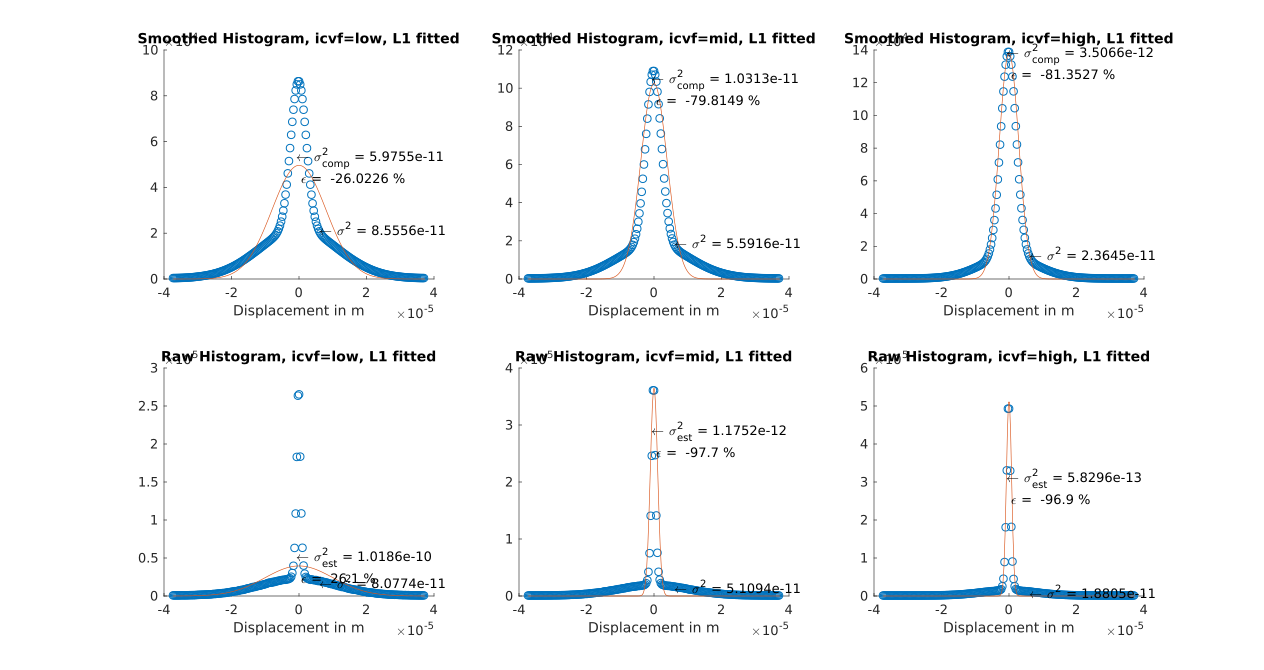

In [2]:
SVG('../tesis-cimat/results/Fit1d_rs.svg')

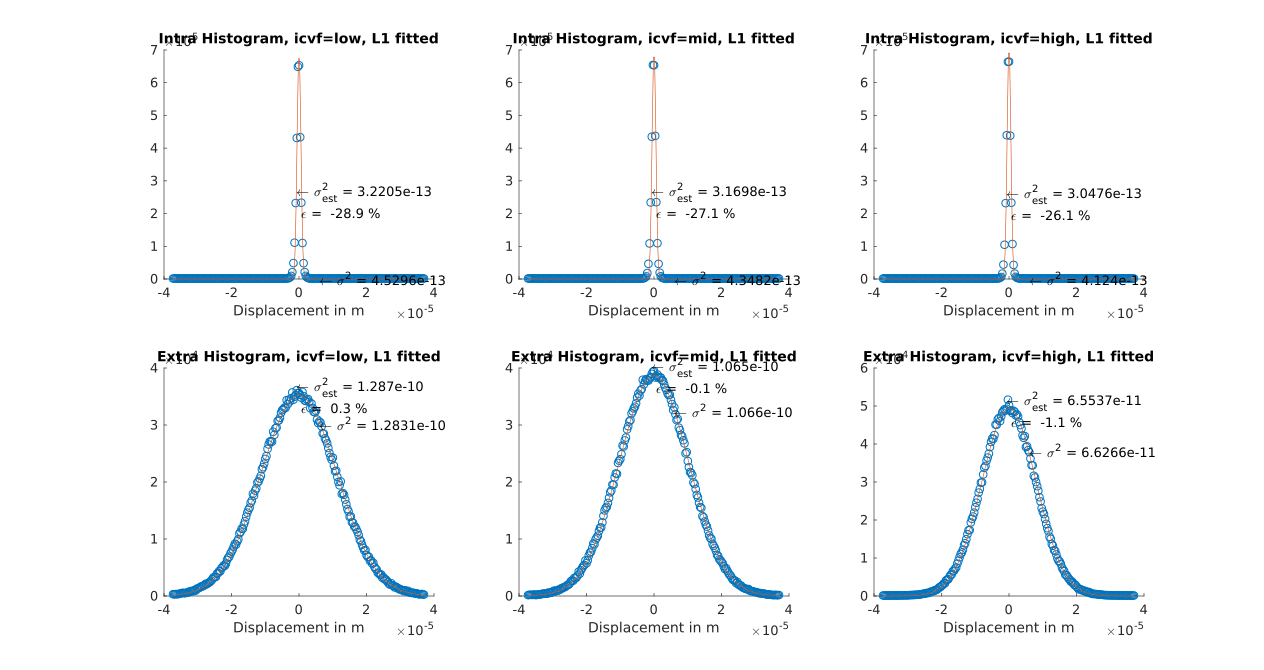

In [3]:
SVG('../tesis-cimat/results/Fit1d_ie.svg')

Relative error percentaje between ground truth and predicted $C_{ort}$

In [4]:
pd.read_csv('../tesis-cimat/results/zeroCrossHistFit.csv')

,Row,TotalRaw,TotalSmoothed,Intra,Extra
0,low,26.1,-26.022625,-28.9,0.3
1,mid,-97.7,-79.814892,-27.1,-0.1
2,high,-96.9,-81.352664,-26.1,-1.1


## \section{Tensor fitting to MRI simulated signal}
It is interesting to compare the information that can be extracted from the MRI signal to what can be inferred directly form the spins. A diffusion tensor is fitted to a the computed signal for each of the simulations $\matr{S}_{sim}$. Each signal to fit is computed  using a PSGE sequence with a defined value of $b$ and and defined gradient directions.

\begin{equation}
argmin_{\hat{D}_{ort}} ||\matr{S}_{sim} - \matr{S}_{model}(\hat{D}_{ort})||_1
\label{eqn:MRIFit_problem}
\end{equation}


The fitting is performed by obtaining a signal from a model of attenuation.


\begin{equation}
S_{model, i}(c) = S_0 \exp(-b \matr{g}^T \matr{D}(c) \matr{g})
\label{eqn:MRIFit_model_p1}
\end{equation}

Where $\matr{D}: \mathbb{R} \to \mathbb{R}^{3 \times 3}$ is a diagonal tensor with the same apparent diffusion coefficients along $x, y$ and $D_{par}$ along $z$.
\begin{equation}
\matr{D}(c) = diag(c, c, D_{par})
\label{eqn:MRIFit_model_p2}
\end{equation}



### \subsection{Results}

No existe el archivo
No existe el archivo
No existe el archivo
No existe el archivo
No existe el archivo
No existe el archivo
No existe el archivo
No existe el archivo
No existe el archivo
No existe el archivo
No existe el archivo
No existe el archivo
Fitting 2.1e-9 low intra
Fitting 2.1e-9 low extra
Fitting 2.1e-9 mid intra
Fitting 2.1e-9 mid extra
Fitting 2.1e-9 high intra
Fitting 2.1e-9 high extra


/home/ponco/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


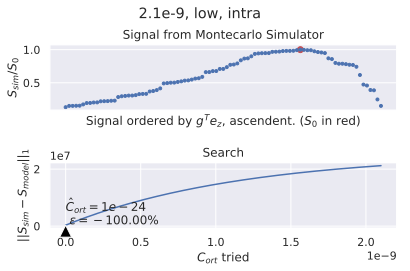

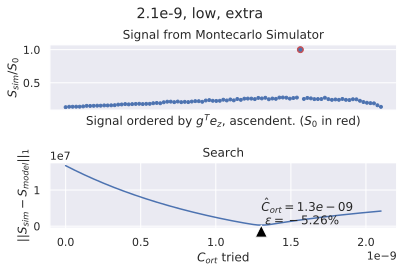

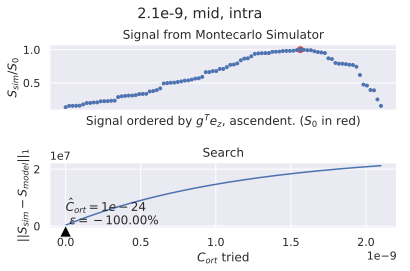

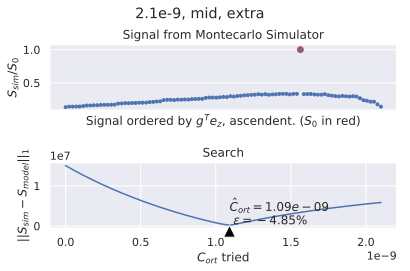

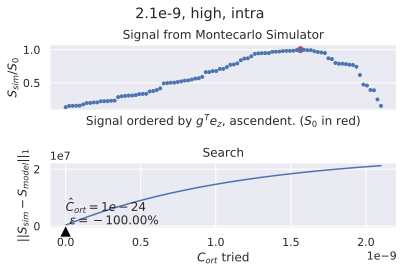

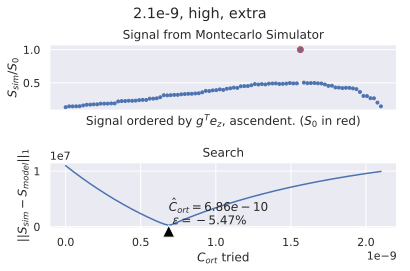

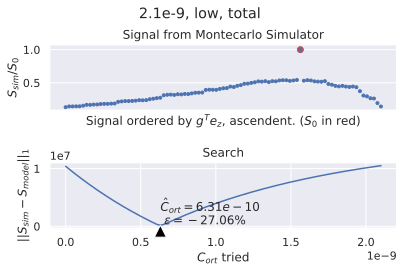

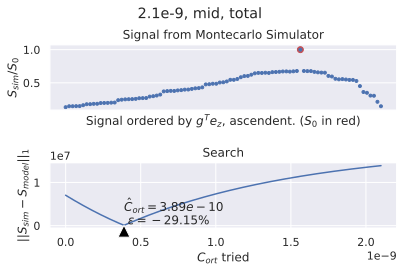

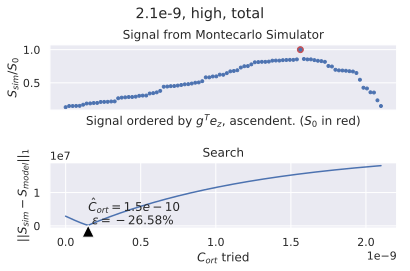

In [5]:
%cd -q ../tesis-cimat/recorrersimuladormc/
%run fitTensorToMRI.py
%cd -q -

Relative error percentage betweeen ground truth and predicted $C_{ort}$

In [6]:
errRes

gt_iniPos,extra,intra,total
gt_icvfLvl,,,
high,-5.472441,-100.0,-26.584850
low,-5.258463,-100.0,-27.059631
mid,-4.847620,-100.0,-29.152962
